### Stock Market Analysis

1. What was the change in price of the stock over time?
2. What was the daily return of the stock on average?
3. What was the moving average of the various stocks?
4. What was the correlation between different stocks' closing prices?
5. What was the correlation between different stocks' daily returns?
6. How much value do we put at risk by investing in a particular stock?
7. How can we attempt to predict future stock behavior?

In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
from pandas.io.data import DataReader
# to read data from google finance/yahoo finance

In [4]:
from datetime import datetime

In [5]:
from __future__ import division

In [6]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
# apple, google, microsoft, amazon

In [7]:
end = datetime.now()
# end date = today

start = datetime(end.year - 1, end.month, end.day)
# start date = 1 year before today

In [8]:
for stock in tech_list:
    globals()[stock] = DataReader(stock, 'yahoo', start, end)
    
# makes the stock ticker a global variable, for example, AAPL, GOOG, etc.
# are now data frames

In [9]:
AAPL.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-08-08,94.260002,94.820000,93.279999,94.739998,41865000,93.147667
2014-08-11,95.269997,96.080002,94.839996,95.989998,36585000,94.376658
2014-08-12,96.040001,96.879997,95.610001,95.970001,33795000,94.356997
2014-08-13,96.150002,97.239998,96.040001,97.239998,31916000,95.605649
2014-08-14,97.330002,97.570000,96.800003,97.500000,28116000,95.861281


In [10]:
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,116.875794,117.859325,115.761548,116.789603,5.294134e+07,115.606402
std,11.335334,11.291463,11.242136,11.249189,2.139167e+07,11.597336
min,94.260002,94.820000,93.279999,94.739998,1.447960e+07,93.147667
25%,107.179998,108.537501,106.357500,107.249998,3.839578e+07,105.521929
50%,118.680001,119.794998,117.720001,118.915001,4.801830e+07,117.472692
75%,127.142502,127.907497,125.982502,126.912502,6.201008e+07,126.029532
max,134.460007,134.539993,131.399994,133.000000,1.898463e+08,131.942761


In [11]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2014-08-08 to 2015-08-07
Data columns (total 6 columns):
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Volume       252 non-null int64
Adj Close    252 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


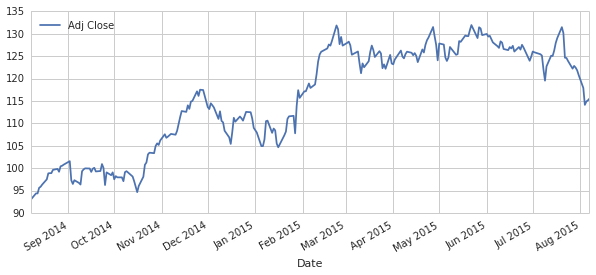

In [12]:
AAPL['Adj Close'].plot(legend = True, figsize = (10, 4))

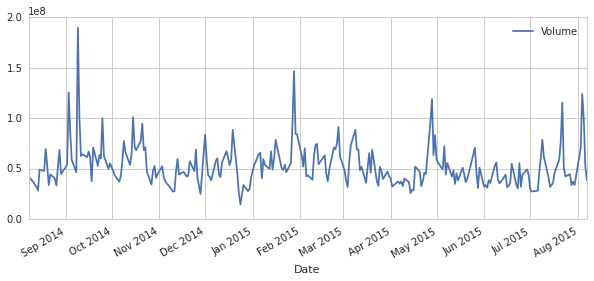

In [13]:
AAPL['Volume'].plot(legend = True, figsize = (10, 4))

For more info on moving averages:

www.investopedia.com/terms/m/movingaverage.asp

In [14]:
ma_day = [10, 20, 50]

# to calculate 10 day, 20 day, and 50 day moving average

for ma in ma_day:
    column_name = 'MA for %s days' %(str(ma))
    
    AAPL[column_name] = pd.rolling_mean(AAPL['Adj Close'], ma)

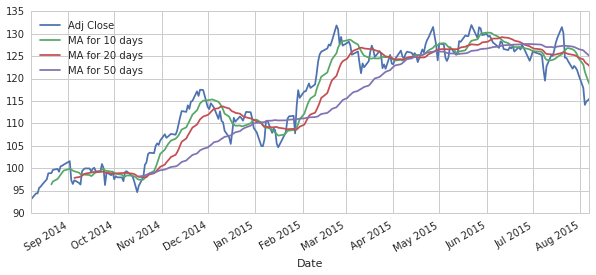

In [15]:
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots = False, figsize = (10, 4))
# set subplots = False so that they all appear on the same plot

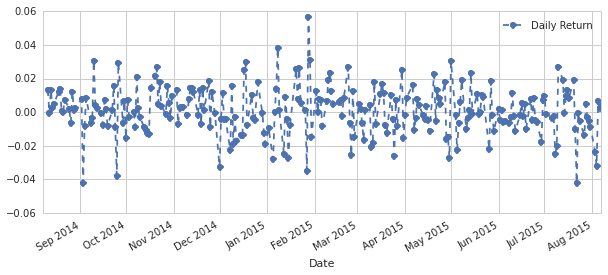

In [16]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize = (10, 4), legend = True, linestyle = '--', marker = 'o')

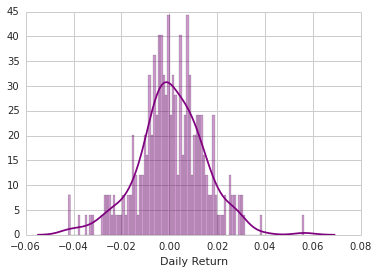

In [17]:
sns.distplot(AAPL['Daily Return'].dropna(), bins = 100, color = 'purple')

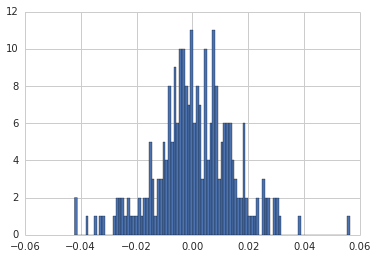

In [18]:
AAPL['Daily Return'].hist(bins = 100)

In [33]:
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

In [34]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2014-08-08,93.147667,316.799988,568.772626,42.087777
2014-08-11,94.376658,318.329987,567.882551,42.087777
2014-08-12,94.356997,319.320007,562.732562,42.399538
2014-08-13,95.605649,326.279999,574.782639,42.945121
2014-08-14,95.861281,333.209991,574.652643,43.130228


In [35]:
tech_rets = closing_df.pct_change()
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2014-08-08,NaN,NaN,NaN,NaN
2014-08-11,0.013194,0.004830,-0.001565,0.000000
2014-08-12,-0.000208,0.003110,-0.009069,0.007407
2014-08-13,0.013233,0.021796,0.021414,0.012868
2014-08-14,0.002674,0.021239,-0.000226,0.004310


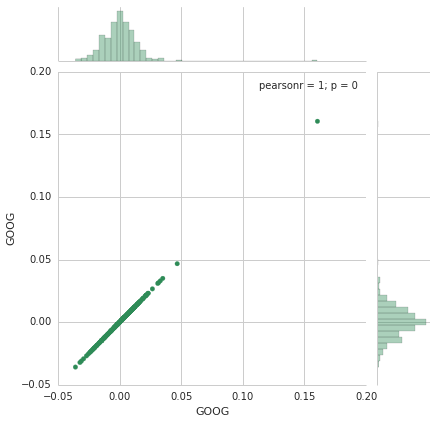

In [22]:
# comparing correlation
# as an example, here we compare google to itself
sns.jointplot('GOOG', 'GOOG', tech_rets, kind = 'scatter', color = 'seagreen')

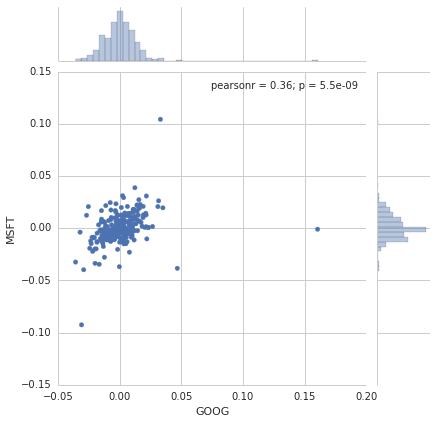

In [23]:
sns.jointplot('GOOG', 'MSFT', tech_rets, kind = 'scatter')

In [24]:
url = 'http://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient'
# info about pearsonr value

In [25]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2014-08-08,NaN,NaN,NaN,NaN
2014-08-11,0.013194,0.004830,-0.001565,0.000000
2014-08-12,-0.000208,0.003110,-0.009069,0.007407
2014-08-13,0.013233,0.021796,0.021414,0.012868
2014-08-14,0.002674,0.021239,-0.000226,0.004310


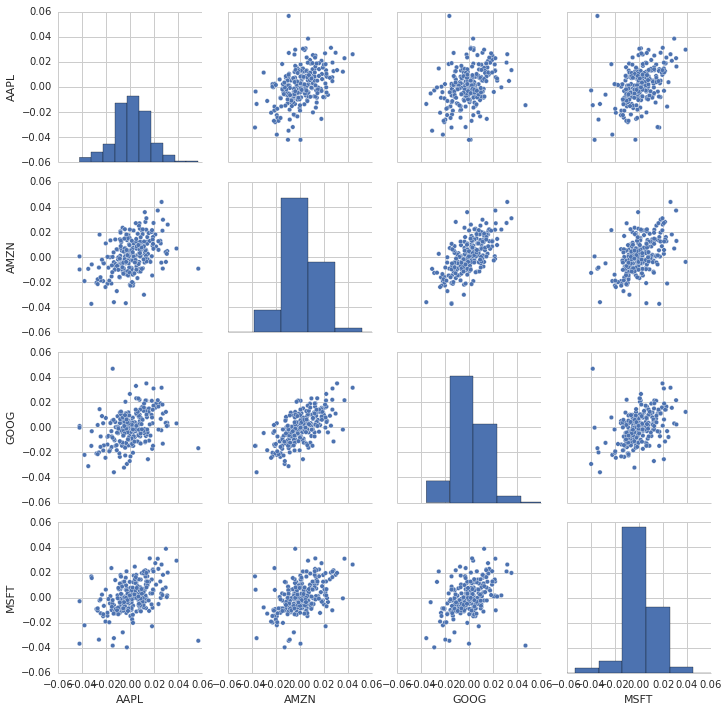

In [26]:
sns.pairplot(tech_rets.dropna())

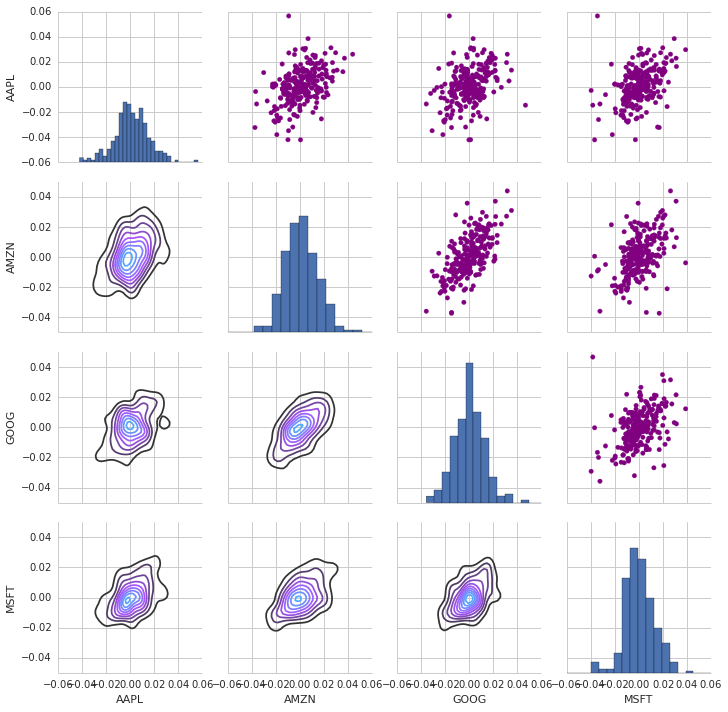

In [31]:
returns_fig = sns.PairGrid(tech_rets.dropna())
# pairplot is built on top of pairgrid, so this is similar to manually
# building a pairplot

returns_fig.map_upper(plt.scatter, color = 'purple')
# mapping the part of the plot above diagonal

returns_fig.map_lower(sns.kdeplot, cmap = 'cool_d')

returns_fig.map_diag(plt.hist, bins = 30)

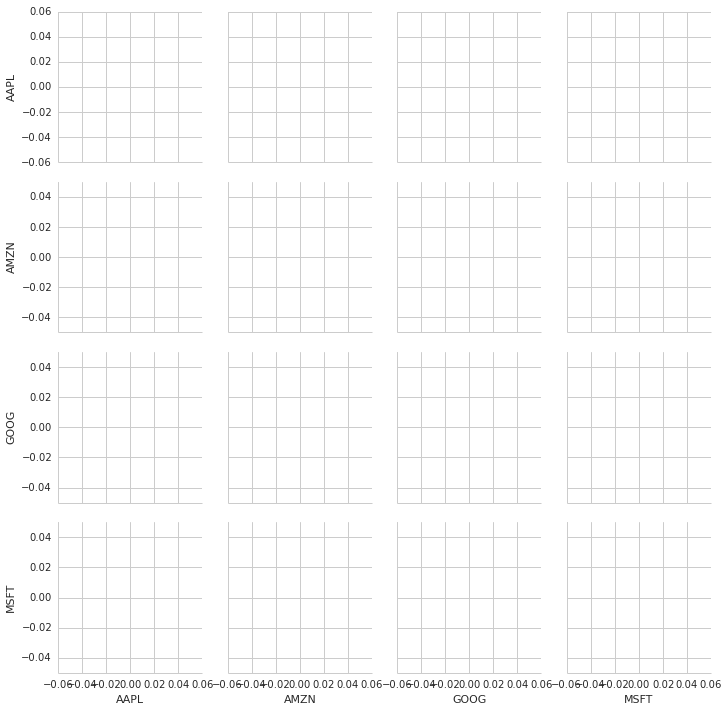

In [47]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter, color = 'purple')
# mapping the part of the plot above diagonal

returns_fig.map_lower(sns.kdeplot, cmap = 'cool_d')

returns_fig.map_diag(plt.hist, bins = 30)

## The upper graph shouldn't be blank, investigate later (lecture 63, ~7 min)

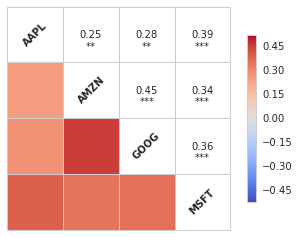

In [39]:
sns.corrplot(tech_rets.dropna(), annot = True)

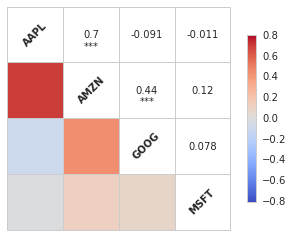

In [40]:
sns.corrplot(closing_df, annot = True)

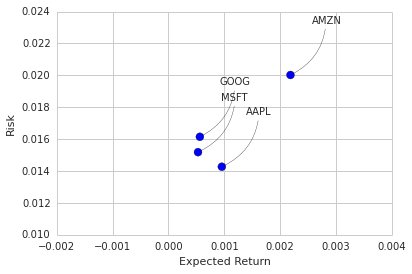

In [41]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.scatter(rets.mean(), rets.std(), s = area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')

# annotation
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label,
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3, rad = -0.3'))

### Value at Risk

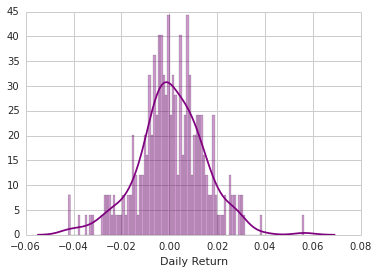

In [42]:
sns.distplot(AAPL['Daily Return'].dropna(), bins = 100, color = 'purple')

In [43]:
rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2014-08-11,0.013194,0.004830,-0.001565,0.000000
2014-08-12,-0.000208,0.003110,-0.009069,0.007407
2014-08-13,0.013233,0.021796,0.021414,0.012868
2014-08-14,0.002674,0.021239,-0.000226,0.004310
2014-08-15,0.004923,0.001261,-0.002036,0.011746


In [46]:
rets['AAPL'].quantile(0.05)

# this means that 95% of the times, your daily loss will be at worst 2% on any given day

-0.024109289989237448

In [48]:
# refer notebook for formulae and explanation
days = 365
dt = 1 / days

mu = rets.mean()['GOOG']
sigma = rets.std()['GOOG']

In [49]:
def stock_monte_carlo(start_price, days, mu, sigma):
    price = np.zeros(days) # set array length to be same as that of days
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in xrange(1, days):
        shock[x] = np.random.normal(loc = mu * dt, scale = sigma * np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x - 1] + (price[x - 1] * (drift[x] + shock[x]))
    
    return price

In [50]:
GOOG.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-08-08,563.562536,570.252576,560.352500,568.772626,1494800,568.772626
2014-08-11,569.992585,570.492553,566.002578,567.882551,1214700,567.882551
2014-08-12,564.522567,565.902572,560.882579,562.732562,1542000,562.732562
2014-08-13,567.312567,575.002602,565.752564,574.782639,1441800,574.782639
2014-08-14,576.182596,577.902645,570.882599,574.652643,985500,574.652643


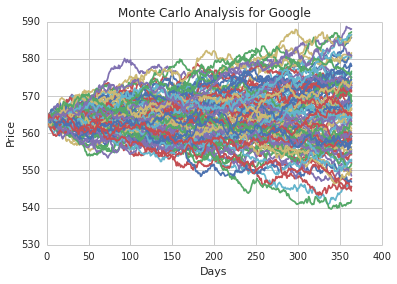

In [51]:
start_price = 563.56

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [52]:
runs = 10000
simulations = np.zeros(runs)

for run in xrange(runs):
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days - 1]

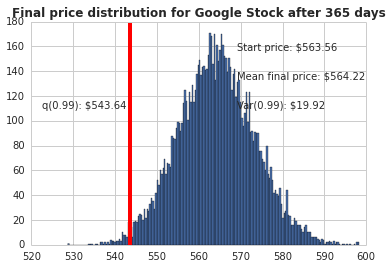

In [54]:
q = np.percentile(simulations, 1)

plt.hist(simulations, bins = 200)

# Starting price
plt.figtext(0.6, 0.8, s = 'Start price: $%.2f' %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, 'Mean final price: $%.2f' %simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, 'Var(0.99): $%.2f' %(start_price - q,))

# display 1% quantile
plt.figtext(0.15, 0.6, 'q(0.99): $%.2f' %q)

# plot a line at the 1% quantile result
plt.axvline(x = q, linewidth = 4, color = 'r')

# title
plt.title(u'Final price distribution for Google Stock after %s days' %days, weight = 'bold')